In [ ]:
# %load 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
import pandas as pd
import numpy as np
pyo.init_notebook_mode()
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/mahsa/Desktop/3.4/Resources/home_value/value_State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month_.csv")

In [3]:
data = data.drop(index=48).sort_values("RegionName").reset_index(drop=True)

In [4]:
value = data.loc[:, "RegionName"].to_frame()

In [5]:
a= value["RegionName"].tolist()

In [6]:
state_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
value["code"] = state_code.loc[:, "code"].tolist()

In [7]:
year_list = ["2017", "2018", "2019", "2020", "2021", "2022"]
for y in year_list:     
    value[y] = (data.filter(like=y, axis=1).sum(axis=1))/12
    

In [8]:
value["Before"] = (value["2018"] + value["2019"])/2
value["During"] = (value["2020"] + value["2021"])/2
value["After"] = value["2022"]
value["Total Mean"] = (value["2017"] + value["2018"]+ value["2019"]+value["2020"]+ value["2021"]+ value["2022"])/5
value["pre-during delta"] = (value["During"] - value["Before"])/value["Before"]
value["during-after delta"] = (value["After"] -value["During"])/value["During"]

In [9]:
New_England = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont"]
Mideast =  ["Delaware", "Maryland", "New Jersey", "New York", "Pennsylvania"]
Great_Lakes = ["Illinois", "Indiana", "Michigan", "Ohio",  "Wisconsin"]
Plains =  ["Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"]
Southeast =  ["Alabama", "Arkansas", "Florida", "Georgia", "Kentucky", "Louisiana", "Mississippi", "North Carolina", "South Carolina", "Tennessee", "Virginia", "West Virginia"]
Southwest =  ["Arizona", "New Mexico", "Oklahoma", "Texas"]
Rocky_Mountain =  ["Colorado", "Idaho", "Montana", "Utah", "Wyoming"]
Far_West =  ["Alaska", "California", "Hawaii", "Nevada", "Oregon", "Washington"]

In [10]:
value2 = value.loc[:, ['RegionName','2017', '2018', '2019', '2020', '2021', '2022']]
region_list = [New_England, Mideast, Great_Lakes, Plains, Southeast, Southwest, Rocky_Mountain, Far_West]
region = ["New England", "Mideast", "Great Lakes", "Plains", "Southeast", "Southwest", "Rocky Mountain", "Far West"]
region_df = pd.DataFrame()
for r in region_list:
    x = value2.loc[value2["RegionName"].isin(r), :].sum()
    if r == New_England:
        x["RegionName"] = "New England"
    if r == Mideast:
        x["RegionName"] = "Mideast"
    if r == Great_Lakes:
        x["RegionName"] = "Great Lakes"
    if r == Plains:
        x["RegionName"] = "Plains"
    if r == Southeast:
        x["RegionName"] = "Southeast"
    if r == Southwest:
        x["RegionName"] = "Southwest"
    if r == Rocky_Mountain:
        x["RegionName"] = "Rocky Mountain"
    if r == Far_West:
        x["RegionName"] = "Far West"    
    region_df = region_df.append(x,ignore_index=True)  


/var/folders/9g/t2y0m0ms2cx8ctm6xwp4wrgw0000gn/T/ipykernel_9441/67424362.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/9g/t2y0m0ms2cx8ctm6xwp4wrgw0000gn/T/ipykernel_9441/67424362.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/9g/t2y0m0ms2cx8ctm6xwp4wrgw0000gn/T/ipykernel_9441/67424362.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/9g/t2y0m0ms2cx8ctm6xwp4wrgw0000gn/T/ipykernel_9441/67424362.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/9g/t2y0m0ms2cx8ctm6xwp4wrgw0000gn/T/ipykernel_9441/67424362.py:23: FutureWarning:

The frame.append method is deprecated and wi

In [11]:
region_df["change2018"] = (region_df["2018"] - region_df["2017"])/region_df["2017"]
region_df["change2019"] = (region_df["2019"] - region_df["2018"])/region_df["2018"]
region_df["change2020"] = (region_df["2020"] - region_df["2019"])/region_df["2019"]
region_df["change2021"] = (region_df["2021"] - region_df["2020"])/region_df["2020"]
region_df["change2022"] = (region_df["2022"] - region_df["2021"])/region_df["2021"]

In [12]:
region_df

,RegionName,2017,2018,2019,2020,2021,2022,change2018,change2019,change2020,change2021,change2022
0,New England,1.589241e+06,1.684700e+06,1.746729e+06,1.864617e+06,2.169181e+06,2.447176e+06,0.060066,0.036819,0.067491,0.163339,0.128157
1,Mideast,1.274501e+06,1.343821e+06,1.408157e+06,1.490293e+06,1.690040e+06,1.863178e+06,0.054390,0.047875,0.058329,0.134032,0.102446
2,Great Lakes,7.499188e+05,8.005924e+05,8.492466e+05,9.084171e+05,1.036244e+06,1.154354e+06,0.067572,0.060773,0.069674,0.140714,0.113978
3,Plains,1.152743e+06,1.209221e+06,1.271517e+06,1.328073e+06,1.526046e+06,1.710145e+06,0.048994,0.051517,0.044480,0.149068,0.120638
4,Southeast,1.885323e+06,1.994250e+06,2.101698e+06,2.249826e+06,2.579312e+06,2.990006e+06,0.057777,0.053879,0.070480,0.146450,0.159226
5,Southwest,7.073534e+05,7.497012e+05,7.927444e+05,8.585045e+05,1.013129e+06,1.192205e+06,0.059868,0.057414,0.082953,0.180110,0.176755
6,Rocky Mountain,1.324584e+06,1.427867e+06,1.531068e+06,1.667513e+06,2.010487e+06,2.320570e+06,0.077974,0.072276,0.089118,0.205680,0.154232
7,Far West,2.230682e+06,2.410441e+06,2.469394e+06,2.650141e+06,3.033421e+06,3.472011e+06,0.080585,0.024457,0.073195,0.144626,0.144586


In [13]:
fig = go.Figure(data=go.Choropleth(
    locations=value['code'], # Spatial coordinates
    z = value['Total Mean'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "$"
))

fig.update_layout(
    title_text = 'Average Home Values Across States',
    geo_scope='usa', # limite map scope to USA
)


pyo.iplot(fig, filename='home_value1')

In [14]:
fig = px.choropleth(value, locations='code', color='pre-during delta',
                    locationmode = 'USA-states',
                    color_continuous_scale=px.colors.diverging.RdBu,
                    color_continuous_midpoint=0,
                    title='Home Value Change: Pre-Pandemic to Pandemic')

fig.update_geos(fitbounds="locations", visible=False, scope="usa")
pyo.iplot(fig, filename='home_value2')

In [15]:
fig = px.choropleth(value, locations='code', color='during-after delta',
                    locationmode = 'USA-states',
                    color_continuous_scale=px.colors.diverging.RdBu,
                    color_continuous_midpoint=0,
                    title='Home Value Change: During-to-Post Pandemic')

fig.update_geos(fitbounds="locations", visible=False, scope="usa")
pyo.iplot(fig, filename='home_value3')

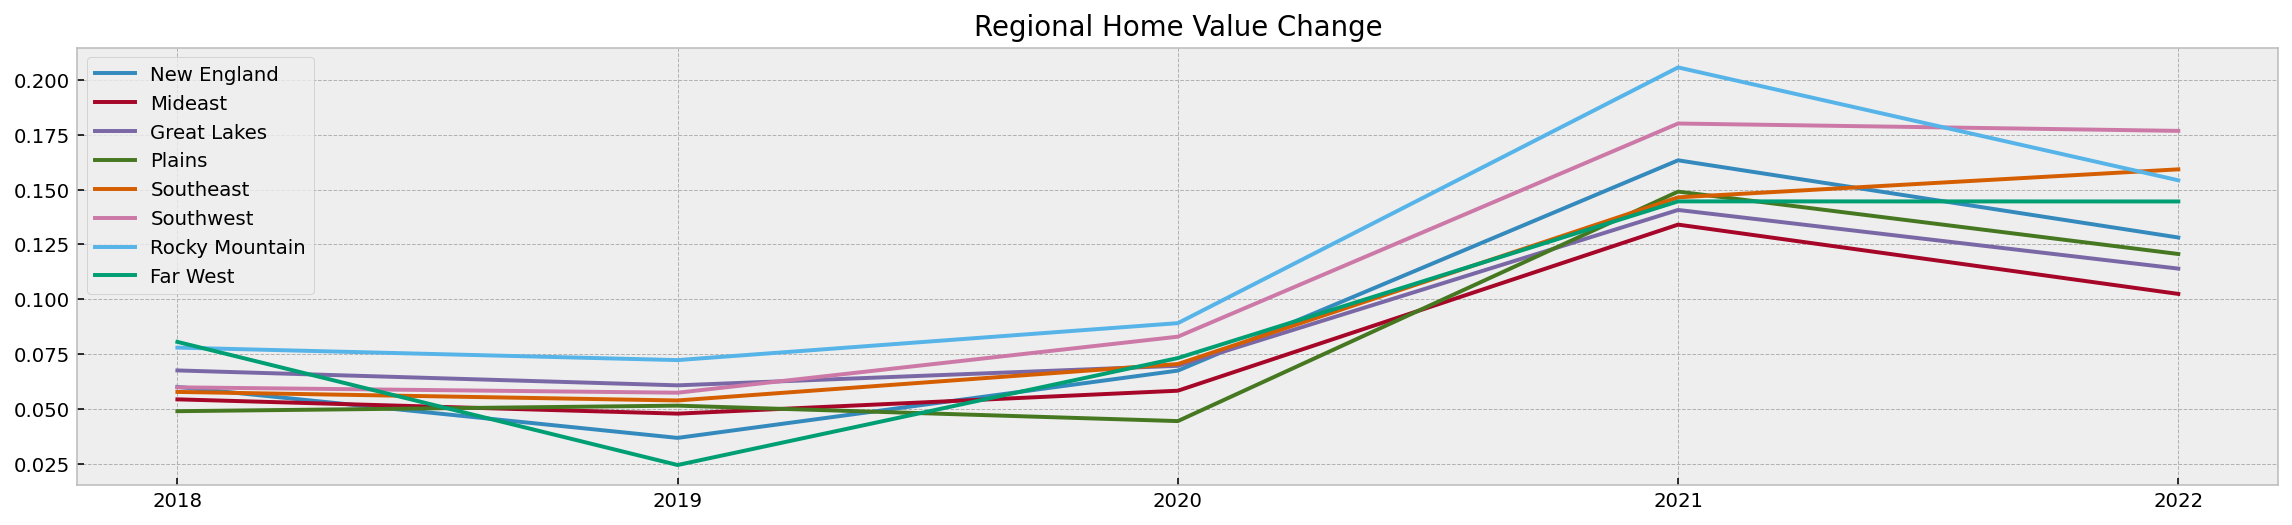

In [16]:
years = [2018, 2019, 2020, 2021, 2022]
f = plt.figure()

f.set_figwidth(20)
f.set_figheight(4)
f.set_dpi(142)
for r in region:
    with plt.style.context('bmh'):
        y_ticks = region_df.loc[region_df["RegionName"]== r , ["change2018", "change2019", "change2020", "change2021", "change2022"]].values[0]
        plt.plot(years, y_ticks)
        plt.xticks(years)
        plt.legend(region)
        plt.title('Regional Home Value Change', fontsize=14)
       